<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Logo_ITESO_normal.jpg/240px-Logo_ITESO_normal.jpg" width="70px" height="15px" />

## PROYECTO 3

* JUAN EMANUEL BERUMEN PELAYO
* SANTIAGO AGUILAR 
* RODRIGO PADILLA 
* WENCELAO PEÑA 

## Simulación matemática. 
###### Prof. CARLOS AUGUSTO ARELLANO MURO <Strong> Email: </Strong>  <font color="#8A0829"> carellanomuro@iteso.mx </font>

# - Tiro parabólico con y sin rozamiento 

In [20]:
#importar librerías
from matplotlib import animation, rc
from IPython.display import HTML
from matplotlib import animation
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import odeint
from scipy import integrate
%matplotlib inline

### Ecuaciones de movimiento 
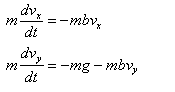

##### Sustituyendo
**Para x:**
$$-(\frac{c}{m})z$$

**Para y:**
$$-g-(\frac{c}{m})z$$




In [21]:
#DEFINIENDO FUNCIONES PARA CADA EJE
def parax (z,x, c = .000001, m = 1):#(para rozamiento c=.1)
    #c= es el factor de rozamiento 
    #m=masa
    return np.array([-(c/m)*z[0], z[0]])
def paray (z,y, c = .00001, m = 1, g = 9.8):#(para rozamiento c=.1)
    #g= gravedad
    #c=factor de rozamiento
    #m=masa
    return np.array([-g-(c/m)*z[0], z[0]])


*Nota: Para expresar el movimiento con rozamiento o no, es necesario modificar el valor c en x y en  y,Para modelar el movimiento sin rozamiento utilizamos un valor muy pequeño para que se considere como 0 pero sin llegar a este(ya que la función daría 0 y no queremos eso)*

#### La velocidad es un vector por lo tanto:

**Descomponemos las fuerzas para x:**
$v(20)*cos(45°)=14.14$

**Descomponemos las fuerzas para y:**
$v(20)*sen(45°)=14.14$

La y maxima es:   10.200901864624567
La x maxima es:   40.80475074261592


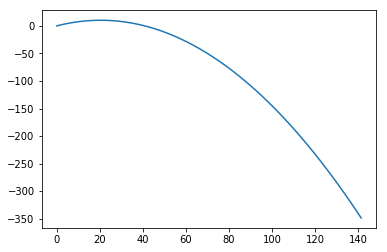

In [22]:
x1 = np.linspace(0,10,500)
y1 = np.linspace(0,10,500)
xerror, a = integrate.odeint(parax,[14.14,0], x1).T# vector de velocidad (en x,v*cos(angulo))
yeroor, b = integrate.odeint(paray,[14.14,0], x1).T# vector de velocidad (en x,v*sen(angulo))
plt.plot(a,b)
for i in range (len(b)):
    n = i + 1
    if b[n]<= 0:# para cortar el movimiento hasta llegar al piso(0)
        break
b[n] = 0
print ('La y maxima es:  ', b.max())# imprimi altura máxima 
print ('La x maxima es:  ', a[n])#imprime longuitud recorrida hasta el 0
a = a[0:n]
b = b[0:n]


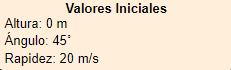

**Tiro parabólico sin rozamiento**

* *Altura máxima:* $10.20 metros$
* *Longitud recorrida:* $40.8 metros$

**Tiro parabólico con rozamiento**

* *Altura máxima:*$9.31 metros$
* *Longitud recorrida:*$34.16 metros$


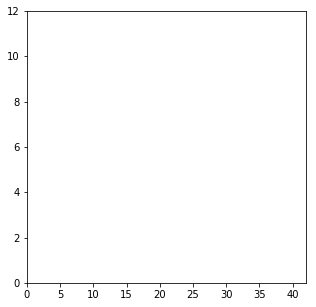

In [23]:
#Generar la animación, el resultado es un plano base donde actuará la animación
fig, ax = plt.subplots(figsize=(5,5))
ax.set_ylim([0, 12])
ax.set_xlim([0, 42])
pendulo1, = ax.plot([], [], 'ro', lw=40)
def init():
    pendulo1.set_data([], [])
    
def update(n):
    x1 =  a[n]
    y1 =  b[n]
    pendulo1.set_data([x1], [y1])
anim = animation.FuncAnimation(fig, update, init_func = init,interval = 50, frames=len(a), blit = False)

In [24]:
#HTML(anim.to_html5_video())
from IPython.display import HTML
HTML(anim.to_jshtml())

In [25]:
#Generar un GIF del movimiento y lo guarda en la carpeta actual 
anim.save('tiroparabolicosinrozamineto.gif', writer='imagemagick') 

MovieWriter imagemagick unavailable. Trying to use pillow instead.


# - Problema de tres cuerpos:
## sol, tierra, luna

In [26]:
#Importar librerías
from matplotlib import animation, rc
from IPython.display import HTML
from matplotlib import animation
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import odeint
from scipy import integrate
%matplotlib inline


### ECUACIONES PARA 3 CUERPOS EN UN SISTEMA

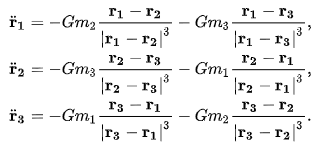

#### Sustitución:
**Para x:**
* $dx1 = -(\frac{(Gm2(x1-x2))}{((x1-x2)^2+((y1-y2)^2))^{1.5}}) -(\frac{(Gm3(x1-x3))}{((x1-x3)^2+((y1-y3)^2))^{1.5}})$
* $dx2 = -(\frac{(Gm3(x2-x3))}{((x2-x3)^2+((y2-y3)^2))^{1.5}}) -(\frac{(Gm1(x2-x1))}{((x2-x1)^2+((y2-y1)^2))^{1.5}})$
* $dx3 = -(\frac{(Gm1(x3-x1))}{((x3-x1)^2+((y3-y1)^2))^{1.5}}) -(\frac{(Gm2(x3-x2))}{((x3-x2)^2+((y3-y2)^2))^{1.5}})$

**Para y:**

* $dy1 = -(\frac{(Gm2(y1-y2))}{((x1-x2)^2+((y1-y2)^2))^1.5}) -(\frac{(Gm3(y1-y3))}{((x1-x3)^2+((y1-y3)^2))^{1.5}})$
* $dy2 = -(\frac{(Gm3(y2-y3))}{((x2-x3)^2+((y2-y3)^2))^1.5}) -(\frac{(Gm1(y2-y1))}{((x2-x1)^2+((y2-y1)^2))^{1.5}})$
* $dy3 = -(\frac{(Gm1(y3-y1))}{((x3-x1)^2+((y3-y1)^2))^1.5}) -(\frac{(Gm2(y3-y2))}{((x3-x2)^2+((y3-y2)^2))^{1.5}})$


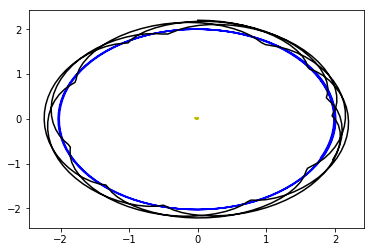

In [38]:

m1 = 16#sol
m2 = 0.1001#tierra
m3 = .00101#luna
G = 1
#usar estos datos para notar la diferencia del sistema fallido
#m1 = 15#sol
#m2 = 0.100#tierra
#m3 = .0010#luna
G = 1
def dx(x, t):# se separan los componentes en x y y, porque se está trabajando com vectores donde r=vector(xi)+vector(yj)
    x1, x2, x3 = x[6], x[7], x[8]
    y1, y2, y3 = x[9], x[10], x[11]
    dx1 = -((G*m2*(x1-x2))/((x1-x2)**2+((y1-y2)**2))**(3/2)) -((G*m3*(x1-x3))/((x1-x3)**2+((y1-y3)**2))**(3/2))
    dx2 = -((G*m3*(x2-x3))/((x2-x3)**2+((y2-y3)**2))**(3/2)) -((G*m1*(x2-x1))/((x2-x1)**2+((y2-y1)**2))**(3/2))
    dx3 = -((G*m1*(x3-x1))/((x3-x1)**2+((y3-y1)**2))**(3/2)) -((G*m2*(x3-x2))/((x3-x2)**2+((y3-y2)**2))**(3/2))
    
    dy1 = -((G*m2*(y1-y2))/((x1-x2)**2+((y1-y2)**2))**(3/2)) -((G*m3*(y1-y3))/((x1-x3)**2+((y1-y3)**2))**(3/2))
    dy2 = -((G*m3*(y2-y3))/((x2-x3)**2+((y2-y3)**2))**(3/2)) -((G*m1*(y2-y1))/((x2-x1)**2+((y2-y1)**2))**(3/2))
    dy3 = -((G*m1*(y3-y1))/((x3-x1)**2+((y3-y1)**2))**(3/2)) -((G*m2*(y3-y2))/((x3-x2)**2+((y3-y2)**2))**(3/2))
    
    return [dx1, dx2, dx3, dy1, dy2, dy3, x[0], x[1], x[2], x[3], x[4], x[5]]

x0 = [ -.02, 2.828, 3.4,0, 0, -0,0,0,0,0, 2, 2.2] # Estado inicial
t = np.linspace(0, 15, 300) # tiempo
lineas = integrate.odeint(dx, x0, t).T # resolver problema de ODE
plt.plot(lineas[6],lineas[9],'y')
plt.plot(lineas[7],lineas[10],'b')
plt.plot(lineas[8],lineas[11],'k')
xsol = lineas[6]
ysol = lineas[9]
xtie = lineas[7]
ytie = lineas[10]
xlun = lineas[8]
ylun = lineas[11]
#plt.xlim(-3,3)
#plt.ylim(-3,3)

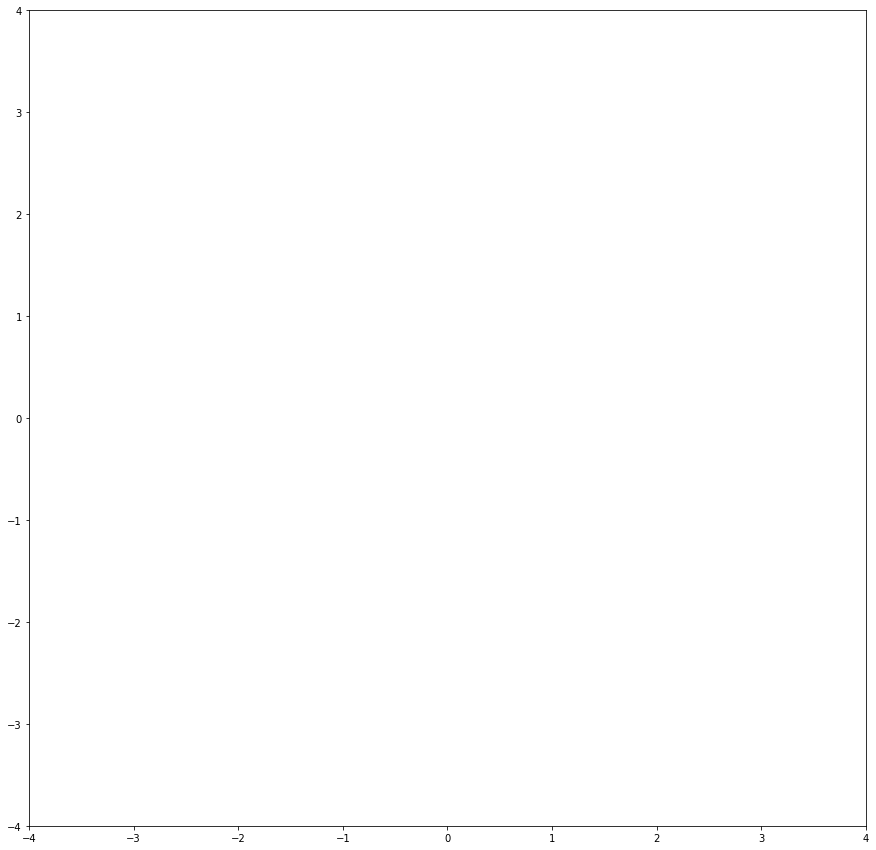

In [39]:
#Generar la animacion y el resultado es el plano que arroja
fig, ax = plt.subplots(figsize=(15,15))
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
sol, = ax.plot([], [], 'yo', ms=40)
tierra, = ax.plot([], [], 'bo', ms=8)
luna, = ax.plot([], [], 'ko', ms=3)
def init():
    sol.set_data([], [])
    tierra.set_data([], [])
    luna.set_data([], [])
def update(n):
    sol.set_data([xsol[n]], [ysol[n]])
    tierra.set_data([xtie[n]], [ytie[n]])
    luna.set_data([xlun[n]], [ylun[n]])
anim = animation.FuncAnimation(fig, update, init_func = init, interval = 150, frames=len(xtie), blit = False)

In [40]:
# visualización del movimiento
from IPython.display import HTML
HTML(anim.to_jshtml())

In [37]:
#Generar un GIF del movimiento y lo guarda en la carpeta actual 
anim.save('sistema.gif', writer='imagemagick') 

MovieWriter imagemagick unavailable. Trying to use pillow instead.
